# Lab Assignment 2

In the third assignment you will classify hand-written digits using logistic regression.

The assignment follows Andrew Ng's explanation of Logistic Regression and (re)watching his videos could be useful (Week 3)

Publish your notebook (ipynb file) to your Machine Learning () repository on Github.

### Deadline October 26th, 23:59

Do not hand in any other files, the Notebook should contain all your answers.

# Collaboration

In my quest to solutions I worked together with Bas Straathof. Any similarities between our codes may therefore not be entirely coincidental, but they were certainly unintended.

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Scikit-learn has the dataset built in. The dataset contains images of hand-written digits that are only 8 by 8 pixels, which means the algorithm (logistic regression) should run on every computer.

The code in the following cell shows how to work with the digits dataset and  how to visualize it. As you can see the numbers are not very clear in 8x8 pixels images, this means we cannot expect our logistic regression will have a very high classification score.

The numbers shown are: 
[[0 1 2 3 4]
 [5 6 7 8 9]]


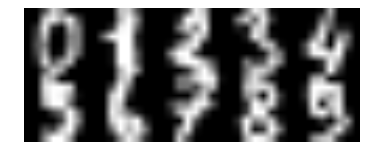

In [7]:
from sklearn.datasets import load_digits
from __future__ import division

digits = load_digits(n_class=10)

#Create two rows with numbers
firstrow = np.hstack(digits.images[:5,:,:])
secondrow = np.hstack(digits.images[5:10,:,:])

plt.gray()
plt.axis('off')

#Show both rows at the same time
plt.imshow(np.vstack((firstrow,secondrow)))

print "The numbers shown are: \n", np.vstack((digits.target[:5],
                                              digits.target[5:10]))

## The implementation

You have to implement the next three functions and fill in the body of the loop in order to create a correct implementation of logistic regression. Don't change the definitions of the functions and input parameters.

Make sure that you do not overfit by keeping track of the score on the test set and implementing a correct stop condition. Also pick a learning rate alpha that makes sure the algorithm learns in a smooth and stable manner.

Plot how your score on the test set improves over time. My best score was about 85% correct!


## Prediction Function

In [8]:
''' 
The hypothesis function returns a prediction
of the input data x for a given theta matrix by
using the sigmoid function for classification. 
'''
def prediction_function(x,theta):
    return 1.0 /(1.0 + e**(-theta.T.dot(x)))

## Cost Function

In [9]:
# We use the output of prediciton_function() for cost_function() the cost function:
'''
The cost_function() takes as inputs an x-value that
was predicted by the function prediciton_function()
and it takes as input the data that corresponds with 
the target digit y, for which it returns the cost J.
'''
def cost_function(x_predict,y):
    return - 1.0 / len(y) * (sum( np.dot(y.T, log(x_predict)) 
                              + np.dot((1 - y.T), log(1 - x_predict))))

## Compute Gradient Function

In [14]:
'''
The compute_gradient() function takes as inputs the predicted
x-value (x_predict), the digit data y and the initial data
set x. The function name gives it away, but this function
computes the gradient. We use the outer product since the
outer product u ⊗ v is the same as a matrix multiplication u v.T,
if u is of shape m x 1 and v of shape n x 1. vT is then a row 
vector, which whould be the case for this logistic regression. 
'''
def compute_gradient(x_predict, y, x):
    # 1/len(x) can be removed as it is basically the same
    # as decreasing alpha, but it seems to work rather
    # nicely as will turn out later. It could be left out.
    return 1 / len(x) * np.outer(x_predict - y, x) 

## Training and Testing the Algorithm

Note:
In order for the cost_function() not to be left out alone, I used it for setting a stop condition to break out of the while loop. However, by observing the graph that shows the evolution of the efficiency (percentage) of the algorithm, we could choose a smart number of iterations, making the stop condition redundant.



Terminating algorithm after 152 iterations because the desired halting condition has been reached.

FINAL ACCURACY OF THE ALGORITHM: 89.23 % 

It follows that we were still unable to correctly classify 10.77 % of the data set. The errors were: 

Algorithm classified a 1 as a 3.
Algorithm classified a 9 as a 0.
Algorithm classified a 6 as a 1.
Algorithm classified a 7 as a 8.
Algorithm classified a 8 as a 1.
Algorithm classified a 9 as a 7.
Algorithm classified a 6 as a 1.
Algorithm classified a 8 as a 1.
Algorithm classified a 0 as a 4.
Algorithm classified a 9 as a 8.
Algorithm classified a 9 as a 1.
Algorithm classified a 7 as a 4.
Algorithm classified a 3 as a 1.
Algorithm classified a 3 as a 7.
Algorithm classified a 3 as a 7.
Algorithm classified a 3 as a 8.
Algorithm classified a 4 as a 8.
Algorithm classified a 4 as a 8.
Algorithm classified a 9 as a 3.
Algorithm classified a 4 as a 8.
Algorithm classified a 9 as a 5.
Algorithm classified a 9 as a 8.
Algorithm classified a 3 as 

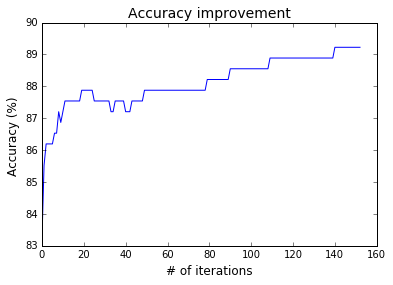

In [36]:
numpy.set_printoptions(threshold='nan')

# Constant linear regression factors
alpha = 0.001 # learning rate
iterations = 500 # maximum number of iterations
stop_condition = 0.00005 # the stop condition

# Init theta matrix with zeros.
theta = np.zeros((64,10))

# Here we split the data set in a learning set and a test set.
x_learn = np.reshape(digits.images[:1500],(1500,64))
x_test = np.reshape(digits.images[1500:],(297,64))

# Naturally, we have to do the same for the target digits
target_learn = digits.target[:1500] 
target_test = digits.target[1500:]

# Cost function values are used for the termination of the 
# while loop and for plotting the values of the cost function to 
# check whether it is monotonically decreasing, as it should.
cost_values = []

# The accuracy of the algorithm will be stored in an array
# So we initialize it as an empty array here.
accuracy = np.array([])

# We need the predicted values to identify errors. We 
# know the size of x_test, so we create an 
# empty matrix that has an equal number of rows as x_test
predicted_values = np.zeros((297,1))

# This is the main body. Training and testing occurs here.
i = 0
while i < iterations:  
    # TRAINING, on the data set x_learn
    for j in range(x_learn.shape[0]):
        # Calculate the prediction value
        x_predict = prediction_function(x_learn[j,:].T,theta)
        # we are looking for digits 0-9, so there are 10 choices
        # -> init an array of size 10
        y = np.zeros(10) 
        # At the right target index in y we insert a 1
        y[target_learn[j]] = 1     
        # The update rule of theta:
        theta = theta - alpha * compute_gradient(x_predict, y, x_learn[j,:].T).T
    
    # We store the values of the cost function per iteration
    cost_values.append(cost_function(x_predict, y))
    
    # TESTING, on the data set x_test
    counter = 0 #  Used for calculating the percentage of correct classifications
    for j in range(x_test.shape[0]):
        # the Numpy function argmax returns an index in an array that holds the highest 
        # value. If this index is the same as the target value for the digit we are 
        # considering, the digit is classified correctly by the algorithm
        if np.argmax(prediction_function(x_test[j,:],theta)) == target_test[j]:
            counter += 1 # Found a correct digit, increment counter by 1
            # Simple percentage calculation, which is done for every iteration,
            # and we use the percentage of the final iteration to append to 
            # the accuracy array.
            percentage = (float(counter)/x_test.shape[0])*100
            # We have correctly classified it: so set the right digit.
            predicted_values[j] = target_test[j]
        else:
            # We have not classified it correctly: set the digit it thought it was. 
            predicted_values[j] = np.argmax(prediction_function(x_test[j,:],theta))

    # Here we append the percentage correctly classified digits.
    accuracy = np.append(accuracy, percentage) 
    
    # Terminate the while loop if the difference between two consecutive cost 
    # function calculations is smaller than the stop condition. 
    if i > 1 and cost_values[i-1] - cost_values[i] < stop_condition: # 
        print "Terminating algorithm after %s iterations because the " \
              "desired halting condition has been reached." % (i) 
        break    
    # Let us not forget this: increment counter while loop.
    i += 1

print "\nFINAL ACCURACY OF THE ALGORITHM: %s %% \n" % (round(accuracy[-1],2))

# Plot of the accuracy percentages
plt.plot(accuracy, 'b')
plt.title('Accuracy improvement', fontsize=14)
plt.xlabel('# of iterations', fontsize=12)
plt.ylabel('Accuracy (%) ', fontsize=12)

# Checking where the code went wrong most of the times.
print "It follows that we were still unable to correctly classify %s %% of the data set. " \
      "The errors were: \n" % (100 - (round(accuracy[-1],2)))
# good thing we saved the predicted values huh?
m = 0
for i in range(len(target_test)):
    # not the same: show which it was supposed to be
    if predicted_values[i] != target_test[i]:
        m += 1
        print "Algorithm classified a %s as a %s." % (target_test[i], int(predicted_values[i][0]))

error_perc = round((m / len(target_test) * 100),2)
print "\nJust a check: these errors indeed comprise %s %% of the testing data set." \
% (error_perc)

## Analysis

The functions appear to function correctly, and perhaps might even be fitting to say that they work amazingly. Of course, these digits were still computer generated, and perhaps it will have difficulty with real hand written digits. A final check we could perform to check whether the algorithm continuously learns, is by plotting the cost function to see whether it decreases all the time. This is the case as can be seen below:

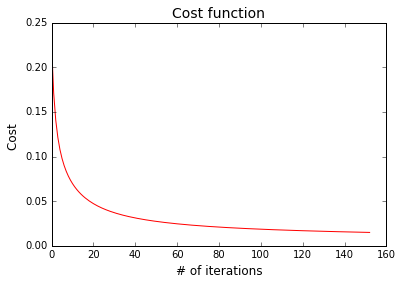

In [35]:
plt.plot(cost_values, 'r')
plt.title('Cost function', fontsize=14)
plt.xlabel('# of iterations', fontsize=12)
plt.ylabel('Cost ', fontsize=12)